In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1

In [105]:
import sqlite3
import datetime
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import time as t
from sklearn.preprocessing import OneHotEncoder

from tabulate import tabulate

#USERS 6 AND 12 HAD CORRUPTED DATA

def encode_OHE(df):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encoder.fit(df)

    new_feats = encoder.transform(df)
    new_cols = pd.DataFrame(new_feats, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop('id', axis=1, inplace=True)
    return new_df

def binary_search(arr, x, isStart):
    low = 0
    high = len(arr) - 1
    mid = 0
    while low <= high:
        mid = (high + low) // 2
        if arr.iloc[mid] < x:
            low = mid + 1
        elif arr.iloc[mid] > x:
            high = mid - 1
        else:
            return mid
    
    return mid + 1
    
def get_data(id):
    con = sqlite3.connect(id)
    
    cur = con.cursor()
    input_signals = []
    recorded_images = []
    matched = []
    
    input_signals = pd.read_sql('SELECT * FROM signals;', con)
    input_signals['dateTime']= pd.to_datetime(input_signals['dateTime'])
    
    recorded_images = pd.read_sql('SELECT id, dateTime, state FROM images;', con)
    recorded_images['dateTime']= pd.to_datetime(recorded_images['dateTime'])
    
    # input_signals = pd.read_sql('SELECT * FROM signals;', con)
    # input_signals['dateTime']= pd.to_datetime(input_signals['dateTime'])
    # input_signals['dateTime']= pd.to_numeric(input_signals['dateTime'])
    # input_signals['deviceType'], deviceTypeUniques = pd.factorize(input_signals['deviceType'])
    # input_signals['actionType'], actionTypeUniques = pd.factorize(input_signals['actionType'])
    # #print(input_signals['actionType'])
    # #print("check1", actionTypeUniques)
    # #print("check2")
    
    # recorded_images = pd.read_sql('SELECT id, dateTime, state FROM images;', con)
    # recorded_images['dateTime']= pd.to_datetime(recorded_images['dateTime'])
    # recorded_images['dateTime']= pd.to_numeric(recorded_images['dateTime'])
    # recorded_images['state'], stateUniques = pd.factorize(recorded_images['state'])
    # #print(recorded_images['state'])
    # #print(stateUniques)

    con.close()
    
    #print("recorded_images", len(recorded_images.index))
    #print("input_signals", len(input_signals.index))
    #print(recorded_images.head)
    #print(input_signals.head)
    #print(encode_OHE(recorded_images).head)
    

    results = {}
    current = recorded_images.iloc[0]['dateTime']
    next = recorded_images.iloc[1]['dateTime']
    
    for i in range(0, len(recorded_images) - 2):
      fromIndex = binary_search(input_signals['dateTime'], current, True)
      toIndex = binary_search(input_signals['dateTime'], next, False)
      results[recorded_images['id'].iloc[i]] = [input_signals.iloc[x] for x in range(fromIndex, toIndex)]

      current = next
      next = recorded_images.iloc[i+2]['dateTime']



    index = 0
    df = pd.DataFrame([])

    print(recorded_images.iloc[index + 1])
    print(recorded_images.iloc[index + 1 + 1])
    df = df.loc[((input_signals['dateTime'] > recorded_images['dateTime'].iloc[index + 1]) & (input_signals['dateTime'] < recorded_images['dateTime'].iloc[index + 1 + 1]))]
    print(df)

    for i in range(1, len(recorded_images) - 1):
      if len(results[i]
        print(results[i])

    

    # for i in range(len(recorded_images.index)-2):
    #     records_exist = False
    #     start = t.time()
    #     for j in range(len(input_signals.index)):
    #         #print("recorded_images", recorded_images.iloc[i])
    #         #print("input_signals", input_signals.iloc[j])
    #         #print("user_inp", type(user_inp))
    #         #print(user_inp)
    #         if ( input_signals.iloc[j]['dateTime'] >= recorded_images.iloc[i+1]['dateTime'] and input_signals.iloc[j]['dateTime'] < recorded_images.iloc[i+2]['dateTime']):
    #             matched.append([ recorded_images.iloc[i+1]['id'], recorded_images.iloc[i+1]['dateTime'], recorded_images.iloc[i+1]['state'], input_signals.iloc[j]['id'], input_signals.iloc[j]['dateTime'], input_signals.iloc[j]['deviceType'], input_signals.iloc[j]['actionType'] ])
    #             records_exist = True
    #     print(t.time() - start)
    #     if records_exist == False:
    #         matched.append([ recorded_images.iloc[i+1]['id'], recorded_images.iloc[i+1]['dateTime'], recorded_images.iloc[i+1]['state'], None, None, None, None ])

    # matched = [x for x in matched if x[4] != None] # filtering out states that do not have matched inputs
    # print("1)",len(matched))
    # previous = matched[0][4]
    # times_both_states = {}
    # for i in range(1, len(matched)): # calculating gaps
    #     gap = (matched[i][4]-previous)
    #     if not (gap.days>0 or gap.seconds//3600>0): # considering only gaps shorter than 1 hour
    #         gap = gap.total_seconds()
    #         gap = round(gap, 2)
    #         if gap in times_both_states:
    #             times_both_states[gap] += 1
    #         else:
    #             times_both_states[gap] = 1
    #     previous = matched[i][4]
    # matched = [x for x in matched if x[2] == "Present"] # filter out all records, except those with 'Present' state
    # print("2)",len(matched))
    # times = {}
    # previous = matched[0][4]
    # for i in range(1, len(matched)):
    #     gap = (matched[i][4]-previous)
    #     if not (gap.days>0 or gap.seconds//3600>0):
    #         gap = gap.total_seconds()
    #         gap = round(gap, 2)
    #         if gap in times:
    #             times[gap] += 1
    #         else:
    #             times[gap] = 1
    #     previous = matched[i][4]
    # result = [times_both_states, times]
    # return result

time_results = {}
#for i in range(1, 15):
#    if i != 9 and i != 6  and i != 12:
time_results['user'+str(13)] = get_data('user'+str(13)+'.sqlite')

Streaming output truncated to the last 5000 lines.
dateTime      2021-10-22 20:27:10.200454
deviceType                      KEYBOARD
actionType                    NON_TYPING
Name: 16133, dtype: object, id                                 16135
dateTime      2021-10-22 20:27:13.086268
deviceType                      KEYBOARD
actionType                    NON_TYPING
Name: 16134, dtype: object, id                                 16136
dateTime      2021-10-22 20:27:13.147067
deviceType                      KEYBOARD
actionType                    NON_TYPING
Name: 16135, dtype: object, id                                 16137
dateTime      2021-10-22 20:27:14.903035
deviceType                      KEYBOARD
actionType                    NON_TYPING
Name: 16136, dtype: object, id                                 16138
dateTime      2021-10-22 20:27:14.967195
deviceType                      KEYBOARD
actionType                    NON_TYPING
Name: 16137, dtype: object, id                            

# Part 2

In [ ]:


for key, item in time_results.items():
    print(key)
    print("absent+present")
    listed_gaps = sorted(item[0].items())
    x, y = zip(*listed_gaps) # plotting
    ticks = x[1::2]
    plt.figure(figsize=(25, 5))
    plt.scatter(x, y, marker='o')
    plt.show()
    print("only present")
    listed_gaps = sorted(item[1].items())
    x2, y2 = zip(*listed_gaps)
    ticks = x2[1::2]
    plt.figure(figsize=(25, 5))
    plt.scatter(x2, y2, marker='o')
    plt.show()

for i in range(3):
    rec = get_data('signals'+str(i)+'.sqlite')
    print("user",9)
    print("absent+present")
    listed_gaps = sorted(rec[0].items())
    x, y = zip(*listed_gaps) # plotting
    ticks = x[1::2]
    plt.figure(figsize=(25, 5))
    plt.scatter(x, y, marker='o')
    plt.show()
    print("only present")
    listed_gaps = sorted(rec[1].items())
    x2, y2 = zip(*listed_gaps)
    ticks = x2[1::2]
    plt.figure(figsize=(25, 5))
    plt.scatter(x2, y2, marker='o')
    plt.show()

user1
absent+present


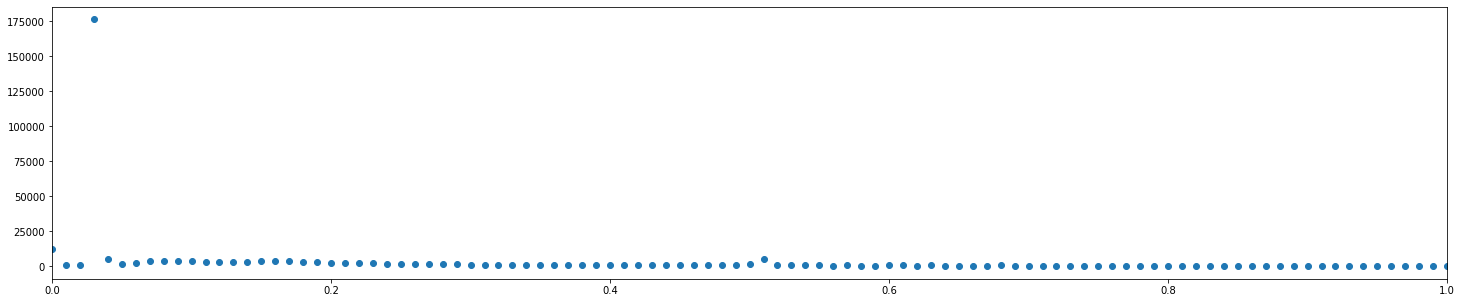

only present


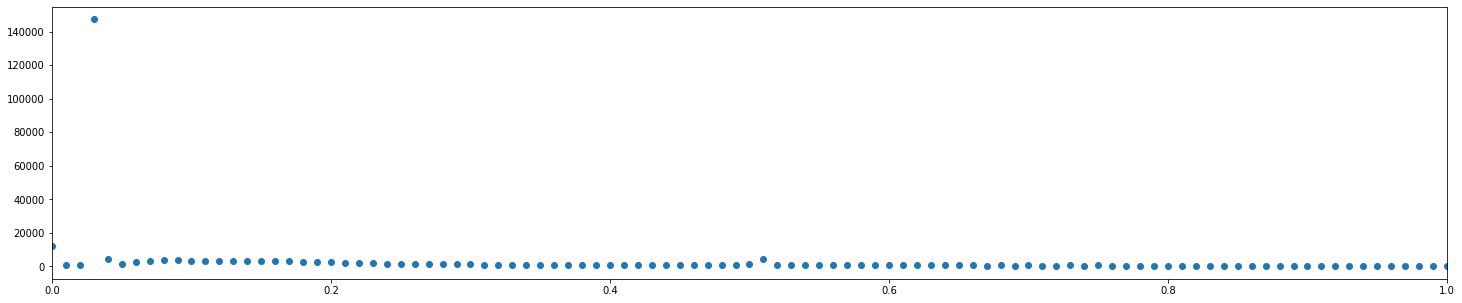

user2
absent+present


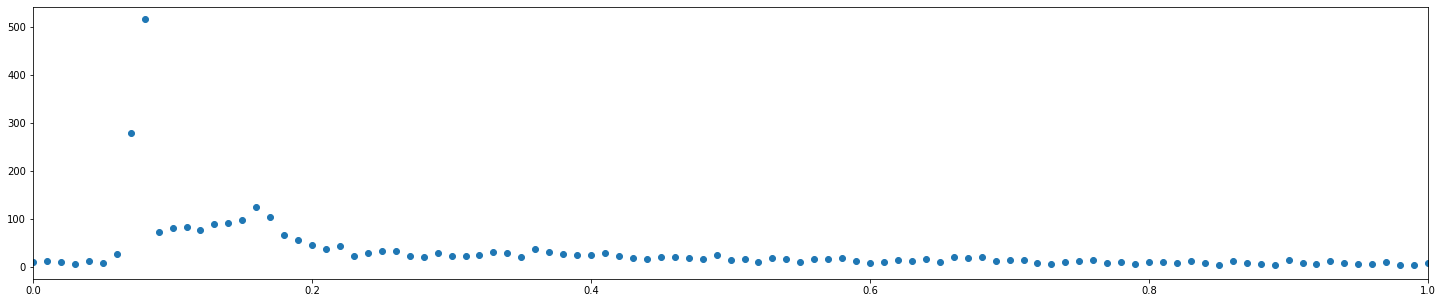

only present


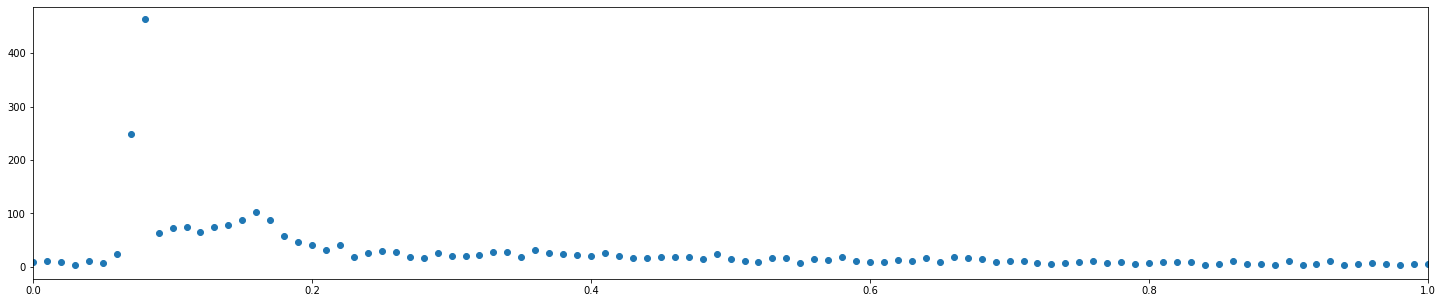

user3
absent+present


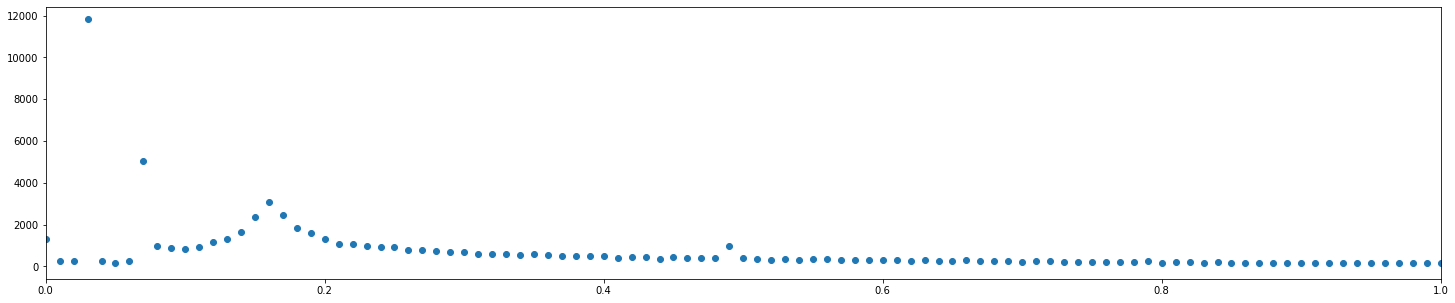

only present


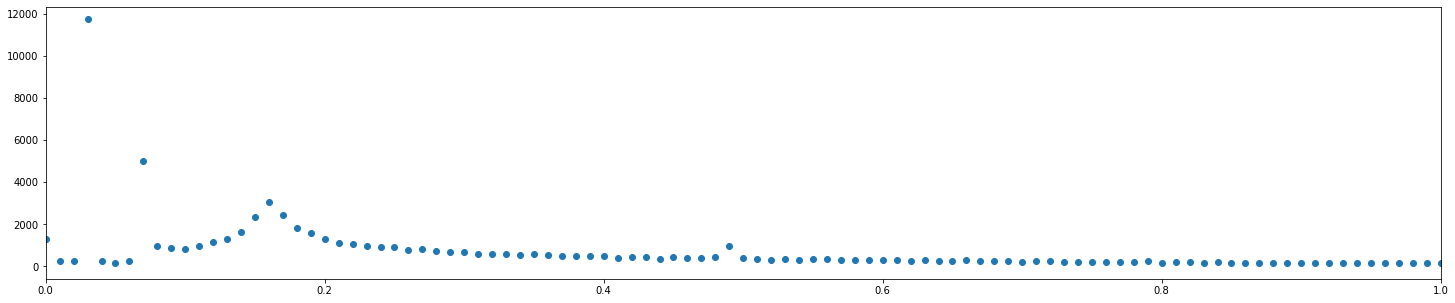

user4
absent+present


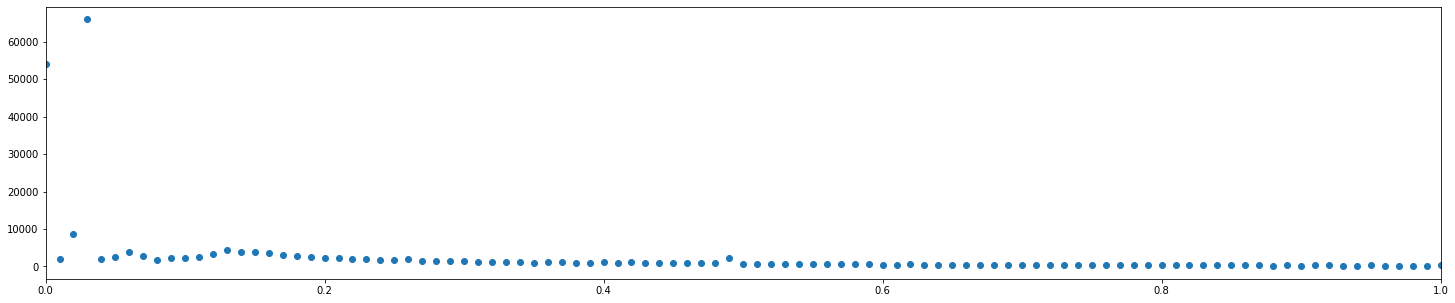

only present


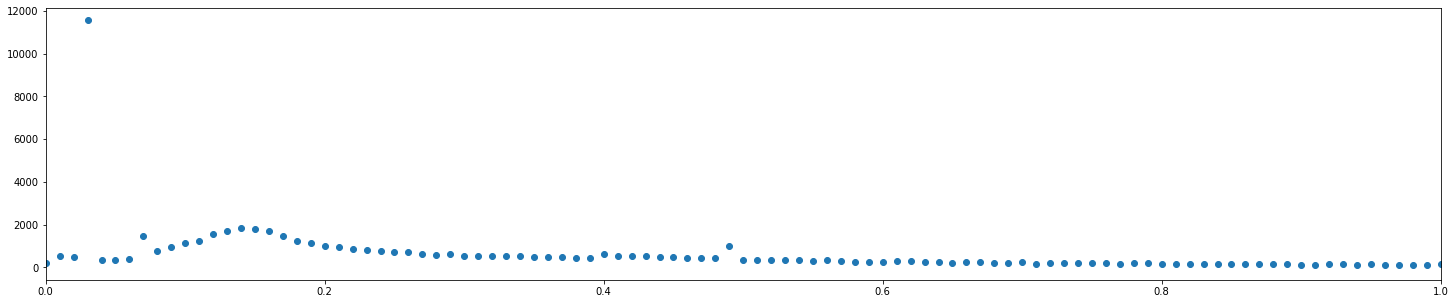

user5
absent+present


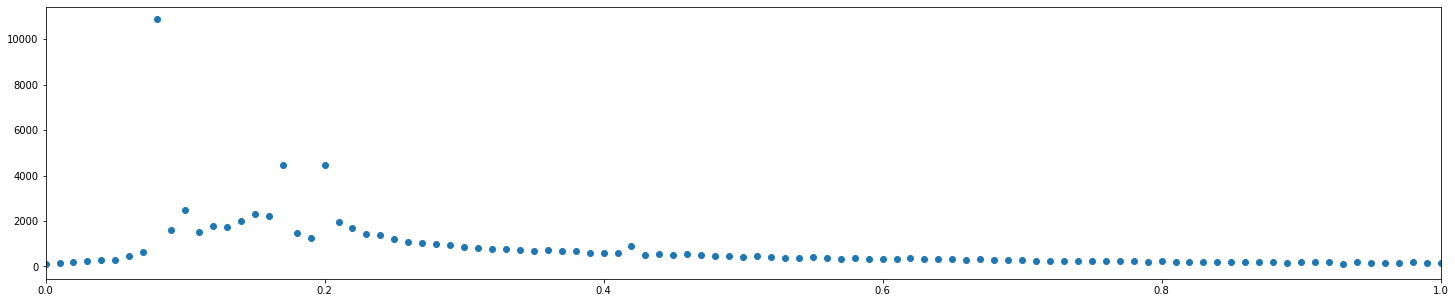

only present


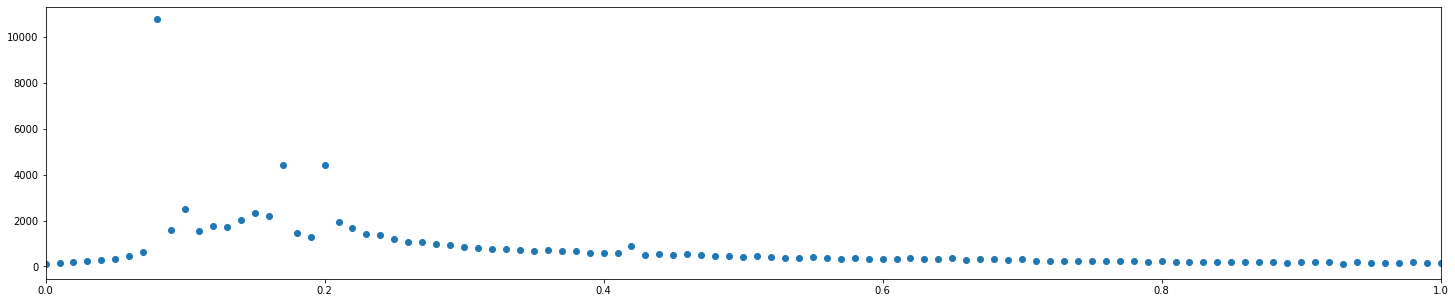

user7
absent+present


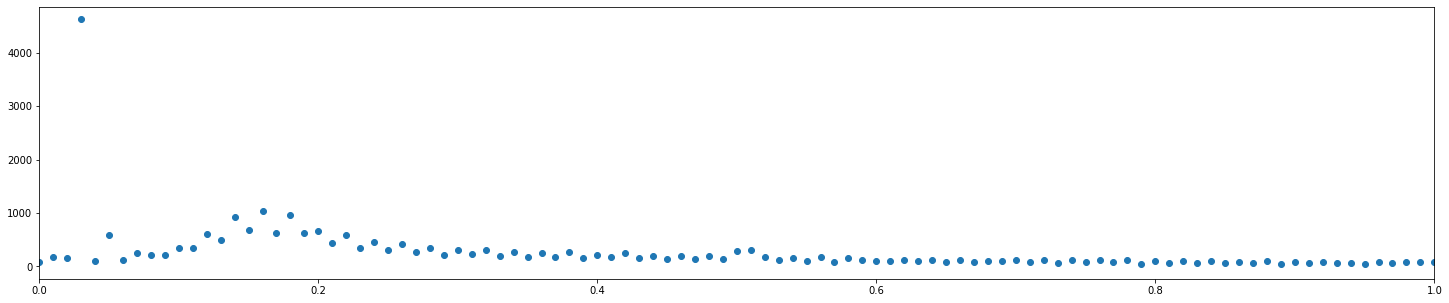

only present


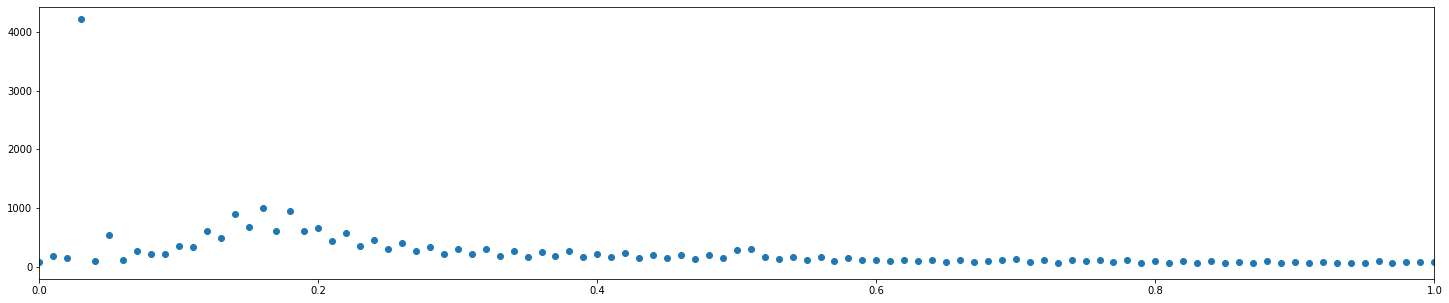

user8
absent+present


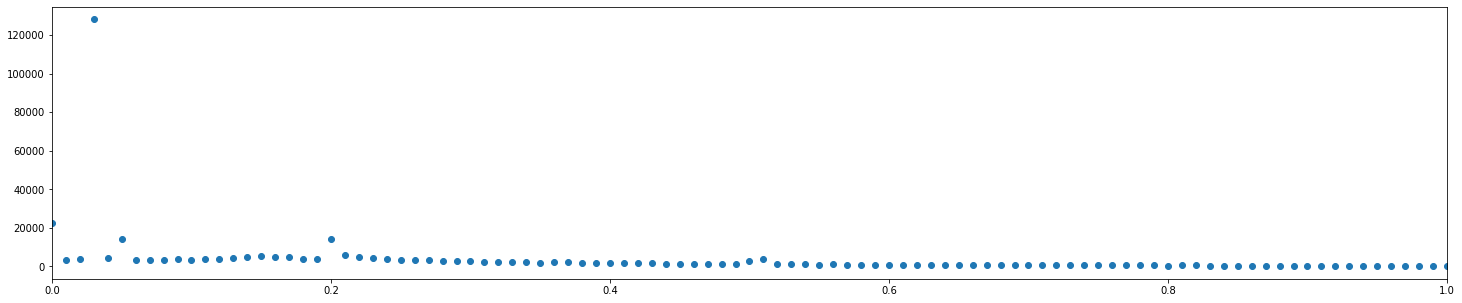

only present


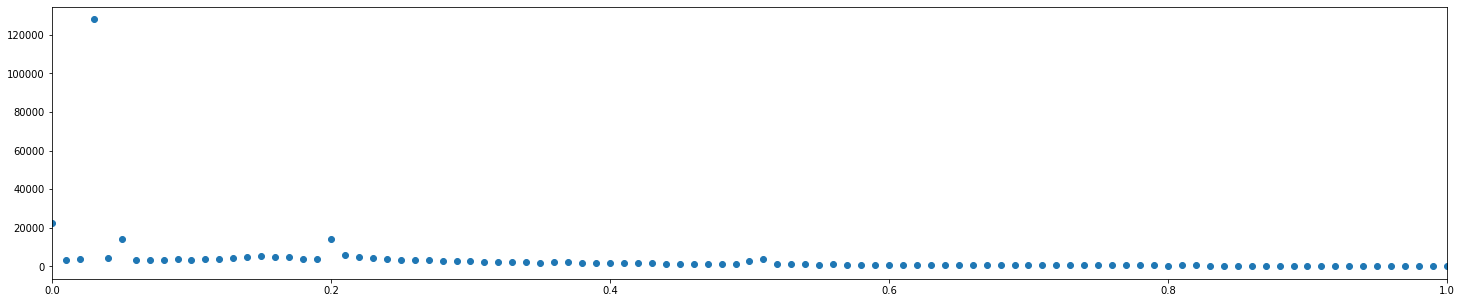

user10
absent+present


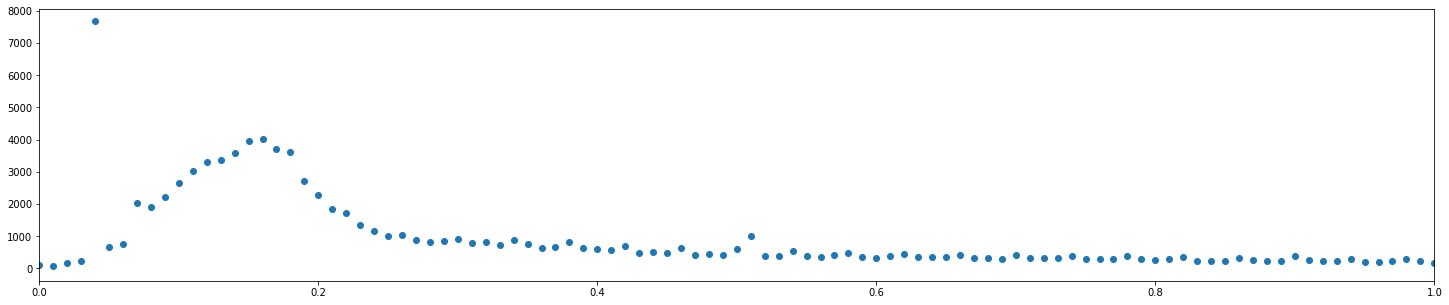

only present


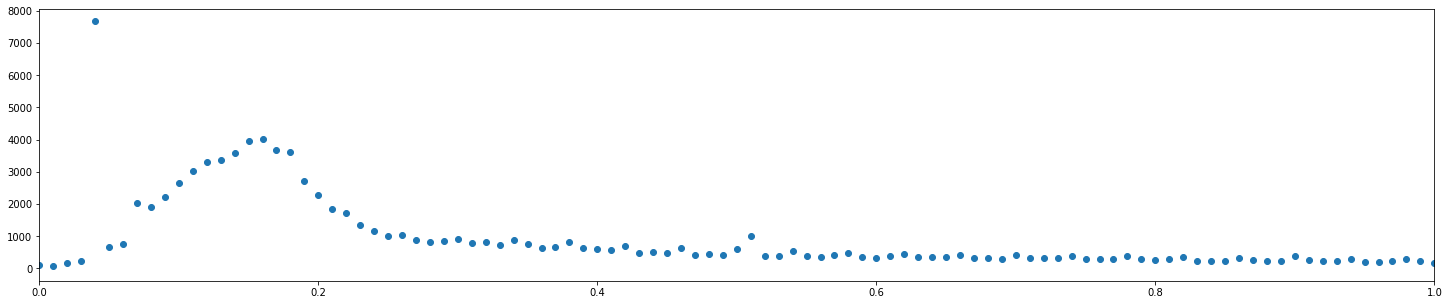

user11
absent+present


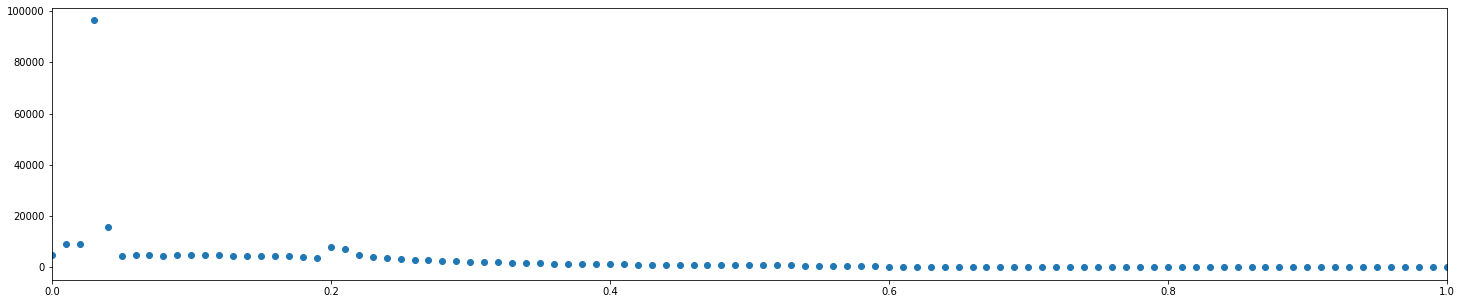

only present


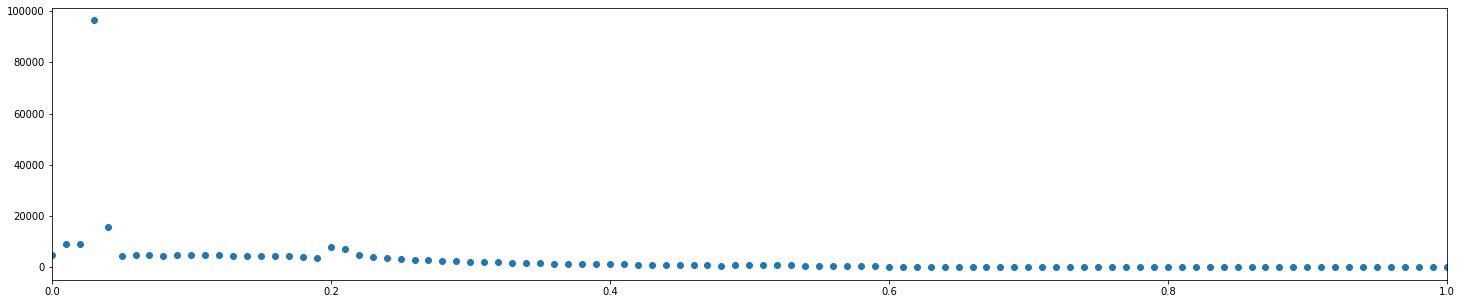

user13
absent+present


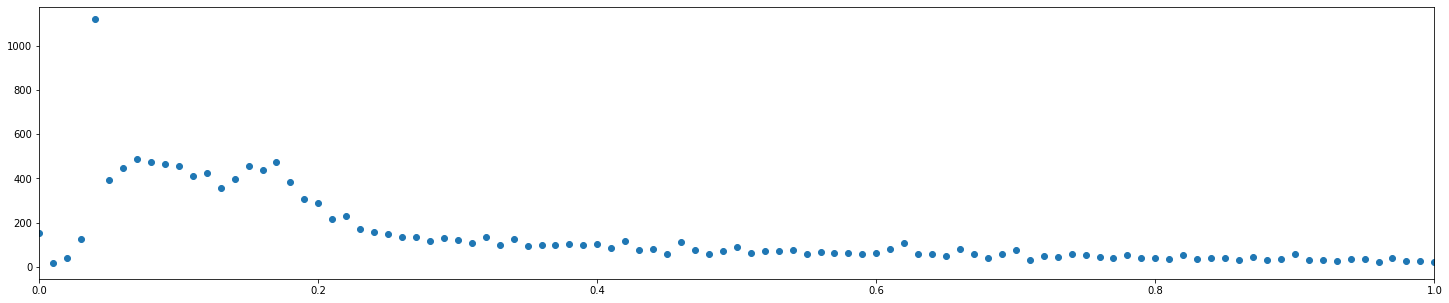

only present


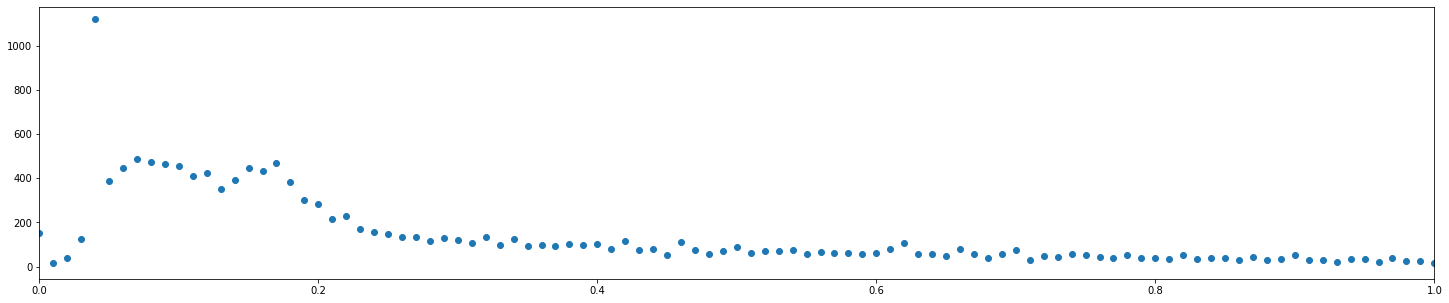

user14
absent+present


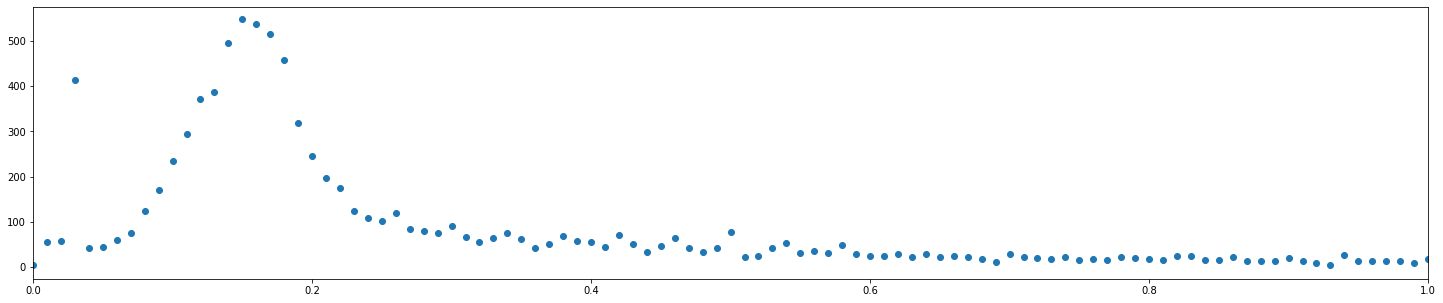

only present


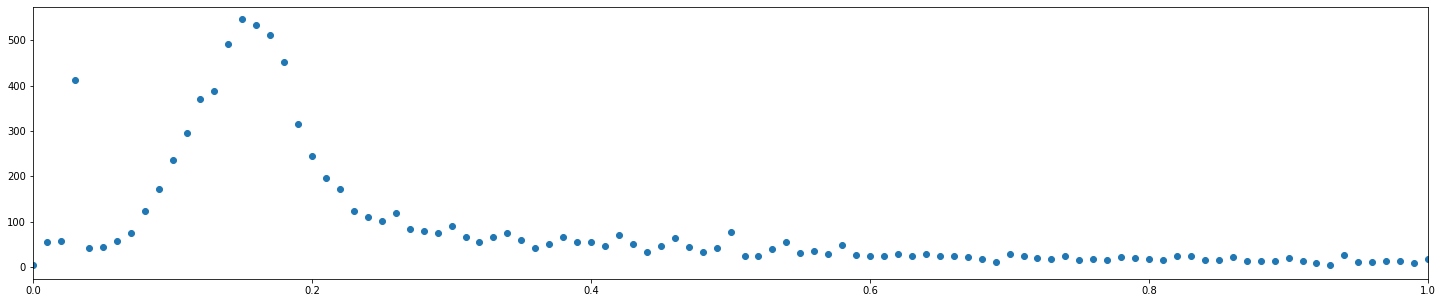

1) 27367
2) 27247
user 9
absent+present


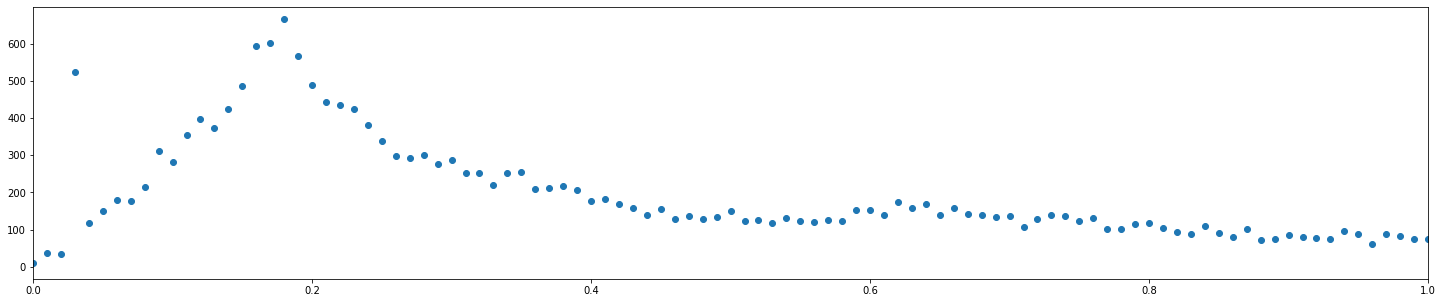

only present


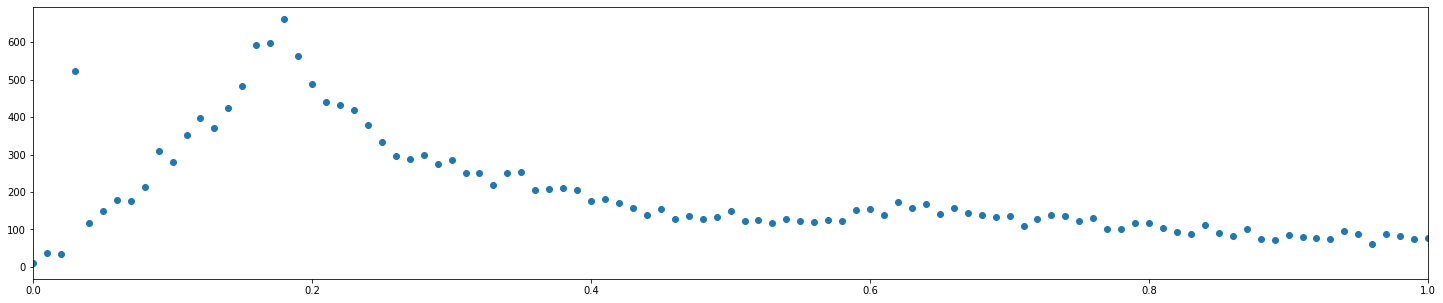

1) 9841
2) 9823
user 9
absent+present


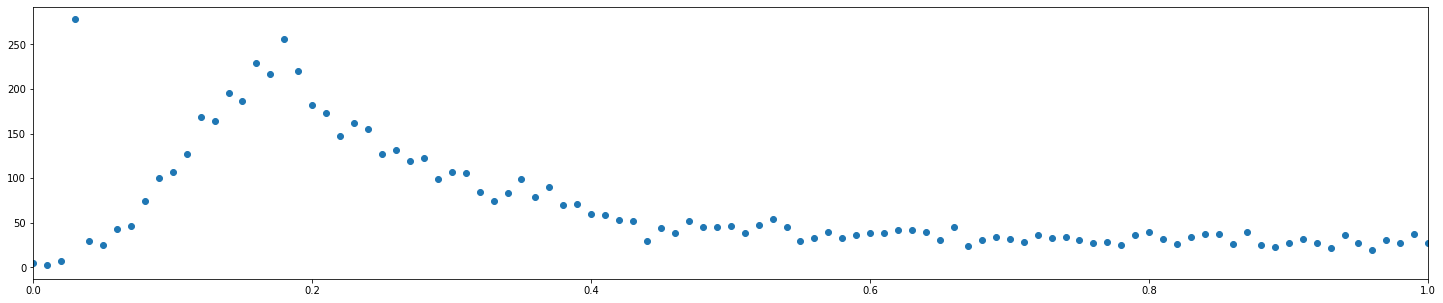

only present


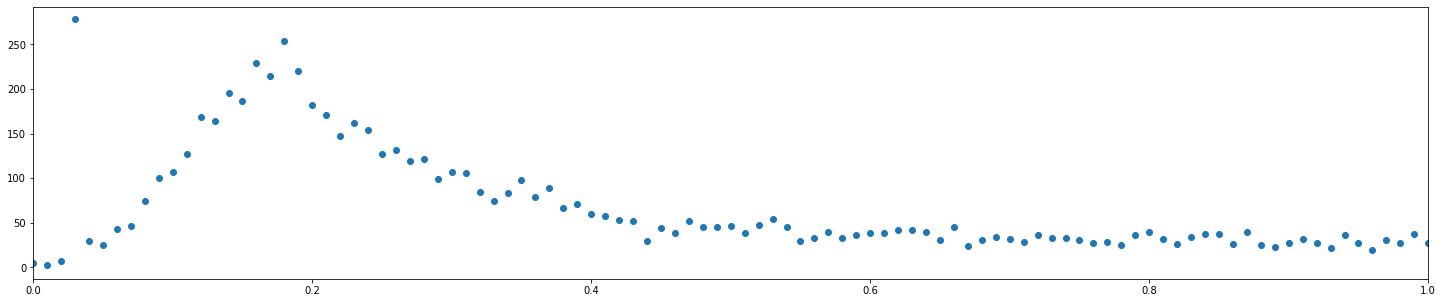

1) 57542
2) 57273
user 9
absent+present


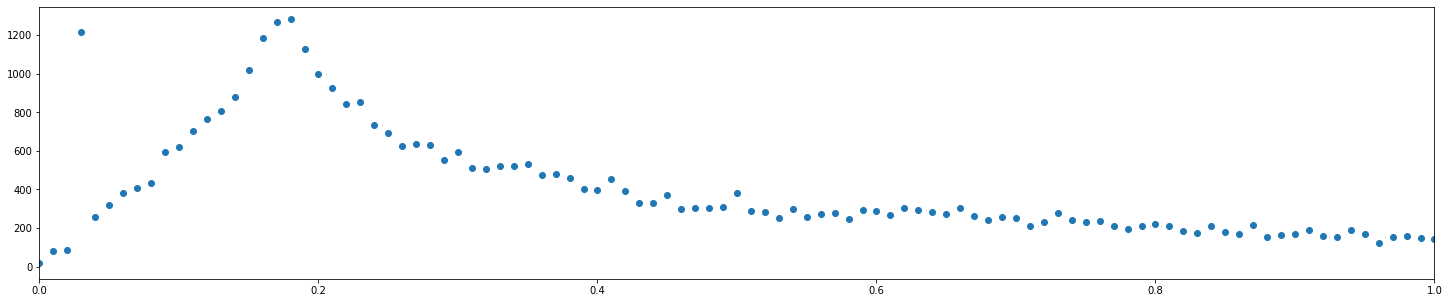

only present


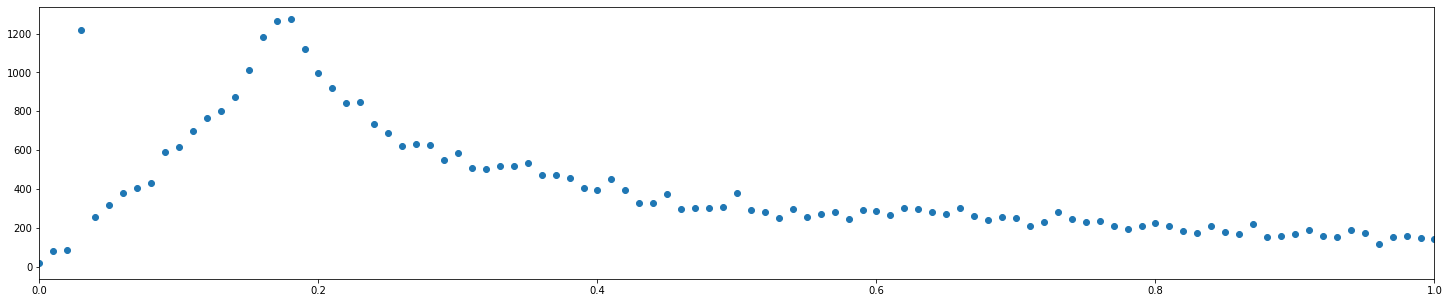

In [ ]:
for key, item in time_results.items():
    print(key)
    print("absent+present")
    listed_gaps = sorted(item[0].items())
    x, y = zip(*listed_gaps) # plotting
    ticks = x[1::2]
    plt.figure(figsize=(25, 5))
    plt.xlim([0.0, 1.0]) # plot with limit on x axis
    plt.scatter(x, y, marker='o')
    plt.show()
    print("only present")
    listed_gaps = sorted(item[1].items())
    x2, y2 = zip(*listed_gaps)
    ticks = x2[1::2]
    plt.figure(figsize=(25, 5))
    plt.xlim([0.0, 1.0]) # plot with limit on x axis
    plt.scatter(x2, y2, marker='o')
    plt.show()

for i in range(3):
    rec = get_data('signals'+str(i)+'.sqlite')
    print("user",9)
    print("absent+present")
    listed_gaps = sorted(rec[0].items())
    x, y = zip(*listed_gaps) # plotting
    ticks = x[1::2]
    plt.figure(figsize=(25, 5))
    plt.xlim([0.0, 1.0]) # plot with limit on x axis
    plt.scatter(x, y, marker='o')
    plt.show()
    print("only present")
    listed_gaps = sorted(rec[1].items())
    x2, y2 = zip(*listed_gaps)
    ticks = x2[1::2]
    plt.figure(figsize=(25, 5))
    plt.xlim([0.0, 1.0]) # plot with limit on x axis
    plt.scatter(x2, y2, marker='o')
    plt.show()